# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

Review Scores Rating                                         \
                              count       mean       std   min   25%   50%   
Neighbourhood                                                                
Bronx                         217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                     8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                   11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                       1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                  96.0  90.843750  9.137923  40.0  87.0  92.0   

                              
                  75%    max  
Neighbourhood                 
Bronx            99.0  100.0  
Brooklyn        100.0  100.0  
Manhattan        99.0  100.0  
Queens          100.0  100.0  
Staten Island    97.0  100.0

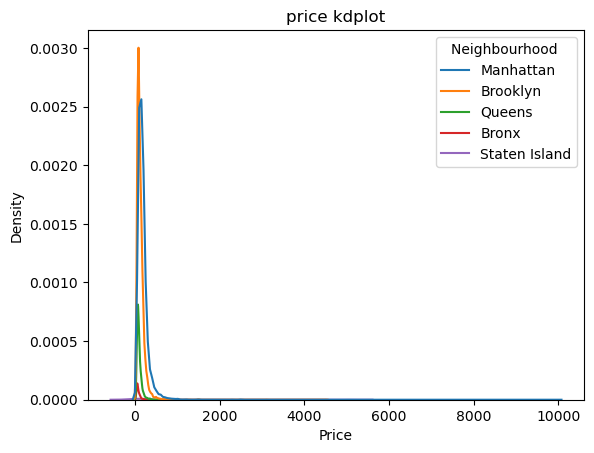

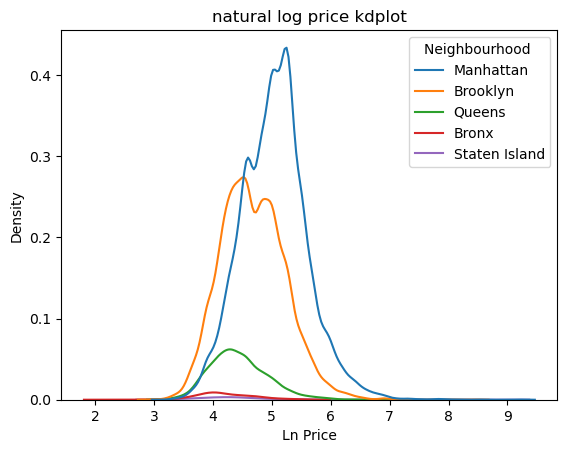

In [3]:
# 1

qdf = pd.read_csv("./data/Q1_clean.csv")

display(qdf.loc[:, ["Price", "Neighbourhood "]].groupby("Neighbourhood ").describe())
display(qdf.loc[:, ["Review Scores Rating", "Neighbourhood "]].groupby("Neighbourhood ").describe())

# Manhattan is the most expensive and Bronx is the least expensive, less than half the average price of Manhattan. Rating scores seem very similar across neighborhoods, Manhattan also has the highest average rating score.

sns.kdeplot(x=qdf["Price"], hue=qdf["Neighbourhood "]).set_title("price kdplot")
plt.show()
qdf["Ln Price"] = np.log(qdf["Price"])
sns.kdeplot(x=qdf["Ln Price"], hue=qdf["Neighbourhood "]).set_title("natural log price kdplot")
plt.show()

# plots match up with describe table, we can see that Manhattan has larger quartile values including the maximum. This shows up in the ln plot where Manhattan's center is the largest. We can also clearly see that Manhattan is by far the most popular; Bronx and Staten Island both barely show up because they have only 100-200 data points compared to Manhattan's almost 12000 data points.

In [4]:
# 2

x = pd.get_dummies(qdf["Neighbourhood "], dtype="int")
y = qdf["Price"]
reg = LinearRegression(fit_intercept=False).fit(x, y)
results = pd.DataFrame({"variable": reg.feature_names_in_, "coefficient": reg.coef_})
results

# the coefficients are the same as the means for each group, basically just calculating average values for each group is the regression

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [7]:
# 3

x = pd.get_dummies(qdf["Neighbourhood "], dtype="int", drop_first=True)
y = qdf["Price"]
reg = LinearRegression().fit(x, y)
print(f"intercept: {reg.intercept_}")
results = pd.DataFrame({"variable": reg.feature_names_in_, "coefficient": reg.coef_})
results

# since we want to keep an intercept we need to drop the reference row which is Bronx in this case. The value for Bronx became the intercept, which shifts all the values in the table to be a number relative to the intercept

intercept: 75.27649769585261


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [12]:
# 4

x = qdf.loc[:, ["Review Scores Rating", "Neighbourhood "]]
y = qdf["Price"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)
xtraindum = pd.concat([xtrain["Review Scores Rating"], pd.get_dummies(xtrain["Neighbourhood "], dtype="int")], axis=1)
xtestdum = pd.concat([xtest["Review Scores Rating"], pd.get_dummies(xtest["Neighbourhood "], dtype="int")], axis=1)
reg = LinearRegression(fit_intercept=False).fit(xtraindum, ytrain)
print(f"R^2: {reg.score(xtestdum, ytest)}")
print(f"RMSE: {np.sqrt(np.mean((ytest - reg.predict(xtestdum)) ** 2))}")
results = pd.DataFrame({"variable": reg.feature_names_in_, "coefficient": reg.coef_})
results

# most expensive property is Manhattan, with highest rating of 100 the price would be about 100 * 1.032257 + 89.42102 = $192.65

R^2: 0.06701086106947296
RMSE: 125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [42]:
# 5

x = qdf.loc[:, ["Review Scores Rating", "Neighbourhood ", "Room Type"]]
y = qdf["Price"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)
xtraindum = pd.concat([xtrain["Review Scores Rating"], pd.get_dummies(xtrain["Neighbourhood "], dtype="int"), pd.get_dummies(xtrain["Room Type"], dtype="int")], axis=1)
xtestdum = pd.concat([xtest["Review Scores Rating"], pd.get_dummies(xtest["Neighbourhood "], dtype="int"), pd.get_dummies(xtest["Room Type"], dtype="int")], axis=1)
reg = LinearRegression(fit_intercept=False).fit(xtraindum, ytrain)
print(f"R^2: {reg.score(xtestdum, ytest)}")
print(f"RMSE: {np.sqrt(np.mean((ytest - reg.predict(xtestdum)) ** 2))}")
results = pd.DataFrame({"variable": reg.feature_names_in_, "coefficient": reg.coef_})
results

# most expensive type of property is entire home/apt and most expensive location is Manhattan, with highest rating of 100 the price of the most expensive property would be about 100 * 0.626912 + 53.693304 + 110.617820 = $227.00

R^2: 0.22035348129282317
RMSE: 114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [ ]:
# 6

# Since the coefficient of `Review Scores Rating` changes based on the inclusion of `Room Type` in the regression, this means that there is some relationship between `Room Type` and `Price`. With the inclusion of `Room Type`, it is clear that the coefficient values for each neighborhood is less spread out, which is why the coefficient for `Review Scores Rating` decreases.

In [98]:
# 7

qdf["Neighbourhood x Room Type"] = qdf["Neighbourhood "].astype("str") + " x " + qdf["Room Type"].astype("str")
x = qdf.loc[:, ["Review Scores Rating", "Neighbourhood x Room Type"]]
y = qdf["Price"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)
xtraindum = pd.concat([xtrain["Review Scores Rating"], pd.get_dummies(xtrain["Neighbourhood x Room Type"], dtype="int")], axis=1)
xtestdum = pd.concat([xtest["Review Scores Rating"], pd.get_dummies(xtest["Neighbourhood x Room Type"], dtype="int")], axis=1)
reg = LinearRegression(fit_intercept=False).fit(xtraindum, ytrain)
print(f"R^2: {reg.score(xtestdum, ytest)}")
print(f"RMSE: {np.sqrt(np.mean((ytest - reg.predict(xtestdum)) ** 2))}")
results = pd.DataFrame({"variable": reg.feature_names_in_, "coefficient": reg.coef_})
results

# not a significant change to previous part for R^2 value and for RMSE, just barely better regression, but coefficients are a lot different, not just the sum of previous part anymore. Surprisingly now Staten Island entire home/apt is most expensive instead of Manhattan entire home/apt, maybe there is a stronger skew or relationship between `Price` and `Room Type` for Staten Island than Manhattan? With highest rating of 100, most expensive property would be about 100 * 0.631849 + 234.958943 = $298.14

R^2: 0.2227250747073224
RMSE: 114.10298034724305


,variable,coefficient
0,Review Scores Rating,0.631849
1,Bronx x Entire home/apt,63.133021
2,Bronx x Private room,3.736301
3,Bronx x Shared room,-21.278036
4,Brooklyn x Entire home/apt,113.784926
5,Brooklyn x Private room,20.579025
6,Brooklyn x Shared room,-3.210858
7,Manhattan x Entire home/apt,169.494389
8,Manhattan x Private room,45.531833
9,Manhattan x Shared room,24.553861


**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


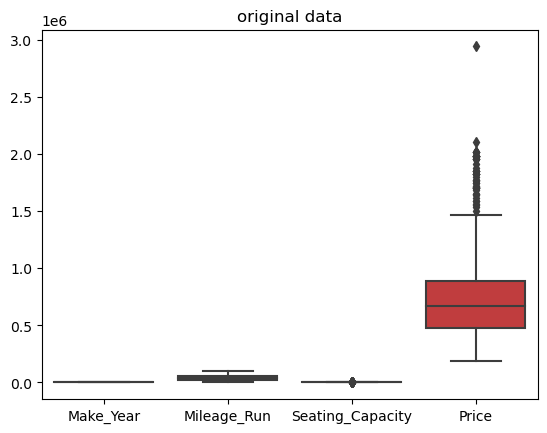

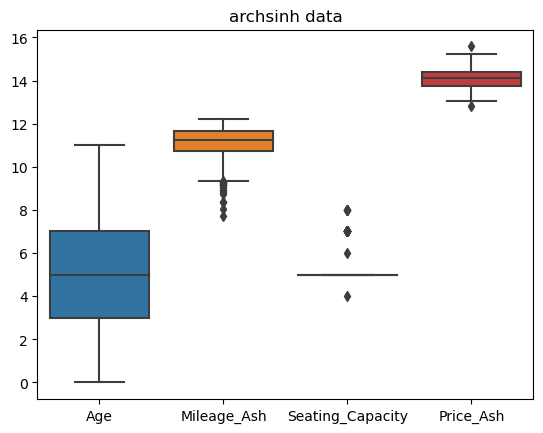

In [35]:
# 1

cdf = pd.read_csv("./data/cars_hw.csv")
print(cdf.columns)
cdf = cdf.drop("Unnamed: 0", axis=1)
sns.boxplot(data=cdf).set_title("original data")
plt.show()
cdf["Age"] = max(cdf["Make_Year"]) - cdf["Make_Year"]
cdf["Mileage_Ash"] = np.arcsinh(cdf["Mileage_Run"])
cdf["Price_Ash"] = np.arcsinh(cdf["Price"])
sns.boxplot(data=cdf[["Age", "Mileage_Ash", "Seating_Capacity", "Price_Ash"]]).set_title("archsinh data")
plt.show()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.000000,453500.000000,246606.366503,267000.000000,288500.000000,345500.000000,537500.000000,892000.000000
Datsun,3.000000,289666.666667,10503.967504,279000.000000,284500.000000,290000.000000,295000.000000,300000.000000
Ford,52.000000,721173.076923,140927.699605,290000.000000,635000.000000,707500.000000,787000.000000,1066000.000000
Honda,73.000000,798972.602740,266509.066586,316000.000000,581000.000000,785000.000000,915000.000000,1537000.000000
Hyundai,305.000000,691891.803279,279159.708519,248000.000000,485000.000000,638000.000000,837000.000000,1742000.000000
Jeep,4.000000,1499500.000000,152513.387391,1290000.000000,1447500.000000,1529500.000000,1581500.000000,1649000.000000
Kia,8.000000,1614750.000000,119056.709177,1369000.000000,1579000.000000,1628500.000000,1705750.000000,1741000.000000
MG Motors,35.000000,1869457.142857,121661.135671,1589000.000000,1786500.000000,1848000.000000,1978000.000000,2019000.000000
Mahindra,18.000000,1100166.666667,175549.305961,796000.000000,1037000.000000,1094500.000000,1157000.000000,1465000.000000


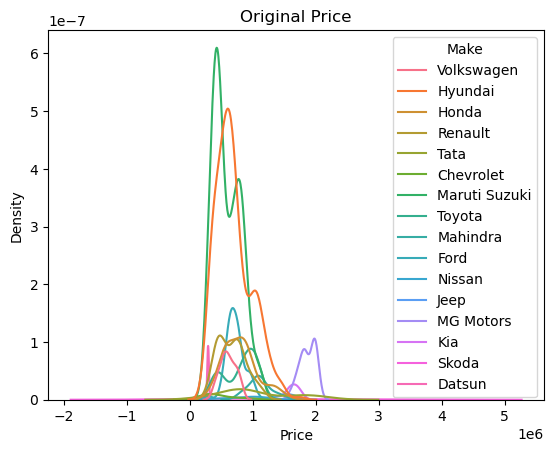

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.000000,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.000000,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.000000,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.000000,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.000000,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.000000,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.000000,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.000000,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.000000,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


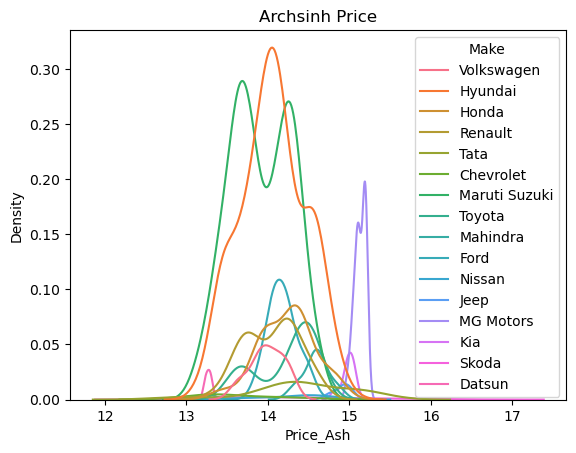

In [32]:
# 2

display(cdf["Price"].groupby(cdf["Make"]).describe().style.set_caption("Original Price Summary"))
sns.kdeplot(data=cdf, x="Price", hue="Make").set_title("Original Price")
plt.show()
display(cdf["Price_Ash"].groupby(cdf["Make"]).describe().style.set_caption("Archsinh Price Summary"))
sns.kdeplot(data=cdf, x="Price_Ash", hue="Make").set_title("Archsinh Price")
plt.show()

# MG Motors seems to be the most expensive then Kia then Jeep, we can see this in the density plots because these are the three graphs that are the most left-skewed. In general prices seem to be unimodal with the exception of a few brands such as Maruti Suzuki, Renault, and Toyota which produce bimodal arcsinh graphs. There is a wide range of prices across all cars ranging from less than two hundred thousand to a little less than three million.

In [100]:
# 3

x = cdf.drop("Price_Ash", axis=1)
y = cdf["Price_Ash"]
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)
print(cdf.shape)
np.random.seed(100)
train = np.random.choice(np.arange(976), size=781, replace=False)
test = [i for i in np.arange(976) if i not in train]
xtrain = x.iloc[train, :]
xtest = x.iloc[test, :]
ytrain = y.iloc[train]
ytest = y.iloc[test]

(976, 14)


In [96]:
# 4

varn = ["Age", "Mileage_Ash", "Seating_Capacity"]
xtrainn = xtrain.loc[:, varn]
xtestn = xtest.loc[:, varn]
regn = LinearRegression().fit(xtrainn, ytrain)
print(f"Numeric R^2: {regn.score(xtestn, ytest)}")
print(f"Numeric RMSE: {np.sqrt(np.mean((ytest - regn.predict(xtestn)) ** 2))}")

varc = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
dumlist = []
for v in varc:
    dumlist.append(pd.get_dummies(x.loc[:, v], dtype="int"))
dumdf = pd.concat(dumlist, axis=1)
xtrainc = dumdf.iloc[train, :]
xtestc = dumdf.iloc[test, :]
regc = LinearRegression().fit(xtrainc, ytrain)
print(f"Categorical R^2: {regc.score(xtestc, ytest)}")
print(f"Categorical RMSE: {np.sqrt(np.mean((ytest - regc.predict(xtestc)) ** 2))}")

xtraina = pd.concat([xtrainn, xtrainc], axis=1)
xtesta = pd.concat([xtestn, xtestc], axis=1)
rega = LinearRegression().fit(xtraina, ytrain)
print(f"All R^2: {rega.score(xtesta, ytest)}")
print(f"All RMSE: {np.sqrt(np.mean((ytest - rega.predict(xtesta)) ** 2))}")

# joint model with all regressors performs best because it has highest R^2 value and lowest RMSE value of about 0.8057/0.1994, outperforms only numeric by about 0.3535/0.1354 and only categorical by about 0.1676/0.0727 respectively


Numeric R^2: 0.45215483953947455
Numeric RMSE: 0.33477159812165436
Categorical R^2: 0.6380288083134147
Categorical RMSE: 0.27211763921951343
All R^2: 0.8056552881204573
All RMSE: 0.19939123105729636


In [114]:
# 5

for i in range(1, 10):
    expander = PolynomialFeatures(degree=i, include_bias=False)
    z = expander.fit_transform(xtrainn)
    names = expander.get_feature_names_out()
    xtrainnp = pd.DataFrame(data=z, columns=names)
    z = expander.fit_transform(xtestn)
    names = expander.get_feature_names_out()
    xtestnp = pd.DataFrame(data=z, columns=names)

    xtrainnp.reset_index(drop=True)
    xtrainc.reset_index(drop=True)
    xtestnp.reset_index(drop=True)
    xtestc.reset_index(drop=True)
    xtrainp = pd.concat([xtrainnp, xtrainc], axis=1)
    xtestp = pd.concat([xtestnp, xtestc], axis=1)
    regp = LinearRegression().fit(xtrainp, ytrain)
    print(f"{i} R^2: {regp.score(xtestp, ytest)}")
    print(f"{i} RMSE: {np.sqrt(np.mean((ytest - regp.predict(xtestp)) ** 2))}")

# seems like best degree is 2 with R^2 about 0.8078 and RMSE about 0.1983, not clear what the pattern of change is but any degree greater than 3 leads to a negative R^2 value,

1 R^2: 0.8051231369267009
1 RMSE: 0.1996640291831158
2 R^2: 0.8078028727914939
2 RMSE: 0.19828649530356074
3 R^2: 0.8043129020926785
3 RMSE: 0.20007866780646366
4 R^2: -41701981779.16699
4 RMSE: 92363.00154454813
5 R^2: -5034513294.608386
5 RMSE: 32092.12216897621
6 R^2: -72153.02532371969
6 RMSE: 121.4926410477808
7 R^2: -109722.39957622014
7 RMSE: 149.8198363088137
8 R^2: -2469972.6354420893
8 RMSE: 710.8301653090696
9 R^2: -10427384104.976862
9 RMSE: 46185.683654854976


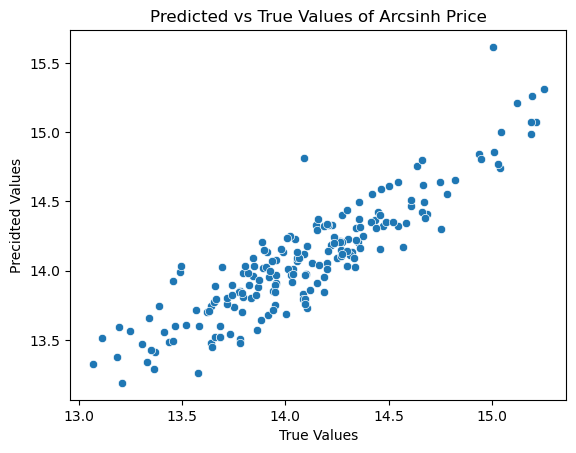

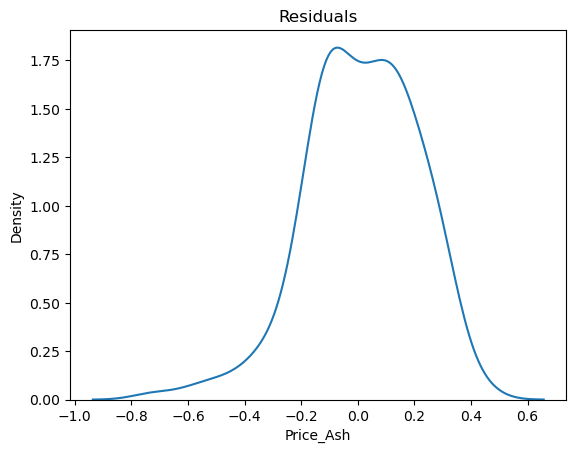

In [117]:
# 6
expander = PolynomialFeatures(degree=2, include_bias=False)
z = expander.fit_transform(xtrainn)
names = expander.get_feature_names_out()
xtrainnp = pd.DataFrame(data=z, columns=names)
z = expander.fit_transform(xtestn)
names = expander.get_feature_names_out()
xtestnp = pd.DataFrame(data=z, columns=names)

xtrainnp.reset_index(drop=True)
xtrainc.reset_index(drop=True)
xtestnp.reset_index(drop=True)
xtestc.reset_index(drop=True)
xtrainp = pd.concat([xtrainnp, xtrainc], axis=1)
xtestp = pd.concat([xtestnp, xtestc], axis=1)
regp = LinearRegression().fit(xtrainp, ytrain)
sns.scatterplot(x=ytest, y=regp.predict(xtestp))
plt.title("Predicted vs True Values of Arcsinh Price")
plt.xlabel("True Values")
plt.ylabel("Precidted Values")
plt.show()
sns.kdeplot(data=ytest - regp.predict(xtestp)).set_title("Residuals")
plt.show()

# predicted and true values seem to line up well against the diagonal meaning that the predictions are relatively accurate except for a few outliers, residual plot is roughly bell-shaped symetric around zero, slight left tail and slight bimodal nature could be from other discrete/categorical variables. The strength of this model is that it is more flexible than just a straight line, which can be seen from the fact that the 2nd degree polynomial model performed better than the joint regression model in part 4. The weakness of this model is that it is extremely sensitive towards outliers which is why there was such big fluctuations in R^2 and RMSE values as the degree increased in the previous part, and also explains why even when we limit the degree to 2 there is a left tail in the residual plot due to outlier points such as when the true value is around 14 or around 15.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?